In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
#     w = np.linalg.inv(np.dot(tx.T, tx)).dot(tx.T).dot(y)
#     e = y - tx.dot(w)
#     N = y.shape[0]
#     mse = 1/(2*N) * e.T.dot(e)
    w = np.linalg.solve(tx.T.dot(tx), tx.T.dot(y))
    return w
#     return w, mse

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    weights, mse = least_squares(y, tx)
    print(weights)
    print(mse)

Test it here

In [4]:
test_your_least_squares()
# Previous values w/ Grid Search: 
# loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579
# i.e. LS has smaller loss

73.29392200210505
13.479712434989228


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from costs import compute_loss
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x, degree)
        weights = least_squares(y, tx)
        
#         weights2 = np.linalg.solve(tx.T.dot(tx), tx.T.dot(y))
        
#         print('y:' + str(y))
#         print('tx:' + str(tx))
        print('w:' + str(weights))
#         print('w2:' + str(weights2))
        
        rmse = np.sqrt(2 * compute_loss(y, tx, weights))
#         rmse = np.sqrt(2 * mse)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

w:[ 0.83431835 -0.28976617]
Processing 1th experiment, degree=1, rmse=0.47187607963421874
w:[-0.11521169  1.58466469 -0.76372992  0.08215316]
Processing 2th experiment, degree=3, rmse=0.25858277667737506
w:[ 3.22356460e-01 -4.05990132e-01  1.64303554e+00 -1.12131782e+00
  2.72479637e-01 -2.25108669e-02 -7.80000176e-04  1.53902707e-04]
Processing 3th experiment, degree=7, rmse=0.24965870360907372
w:[ 5.59478867e-01 -3.48504077e+00  1.35005623e+01 -2.05153418e+01
  1.44735883e+01 -2.27689102e+00 -3.69010319e+00  3.00721973e+00
 -1.11518519e+00  2.38694556e-01 -3.02398746e-02  2.11077514e-03
 -6.26855326e-05]
Processing 4th experiment, degree=12, rmse=0.24328247481248672


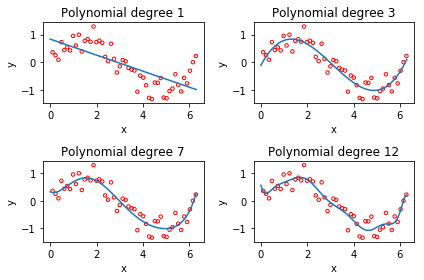

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [9]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    
    num_row = len(y)
    random_indices = np.random.permutation(num_row)
    
    index_split = int(np.floor(ratio * num_row))
    
    index_tr = random_indices[:index_split] # First ratio*100
    index_te = random_indices[index_split:] # Last ratio*100
    
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

Then, test your `split_data` function below.

In [10]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    weights = least_squares(y_tr, tx_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * compute_loss(y_tr, tx_tr, weights))
    rmse_te = np.sqrt(2 * compute_loss(y_te, tx_te, weights))
#     rmse_tr = np.sqrt(2 * mse)
#     rmse_te = np.sqrt(2 * mse)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [11]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.548
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.254
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.651


# 3 Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
#     N = tx.shape[0]
    ai = lambda_*2*tx.shape[0]*np.eye(tx.shape[1])
#     print(ai)
    a = np.dot(tx.T,tx) + ai
#     print(a)
    b = np.dot(tx.T, y)
    # Gives different results than solution because y is different for some reason
#     print('y:')
#     print(y)
    result = np.linalg.solve(a, b)
#     print(result)
    return result

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        weight = ridge_regression(y_tr, tx_tr, lambda_)
        
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, tx_tr, weight)))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, tx_te, weight)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.254, Testing RMSE=0.274
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.254, Testing RMSE=0.272
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.255, Testing RMSE=0.268
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.257, Testing RMSE=0.260
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.262, Testing RMSE=0.248
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.279, Testing RMSE=0.240
proportion=0.5, degree=7, lambda=0.193, 

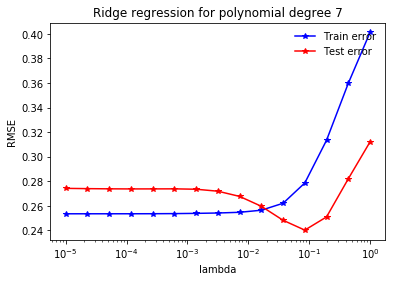

In [14]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)